# Gaussian Mixture Model (GMM)
- assumption: he data is generated by a mixture of several Gaussian distributions, each corresponding to a cluster
- goal: to estimate the parameters of these Gaussian distributions and the mixing proportions to best fit the data

## Clustering

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm
from sklearn.mixture import GaussianMixture

In [2]:
# example 1

n_samples = 300
np.random.seed(0)

# generate spherical data centered on (20, 20)
shifted_gaussian = np.random.randn(n_samples, 2) + np.array([3, 5])

# generate zero centered stretched Gaussian data
C = np.array([[0.0, -0.5], [5.5, 0.7]])
stretched_gaussian = np.dot(np.random.randn(n_samples, 2), C)

# concatenate the two datasets into the final training set
X_train = np.vstack([shifted_gaussian, stretched_gaussian])

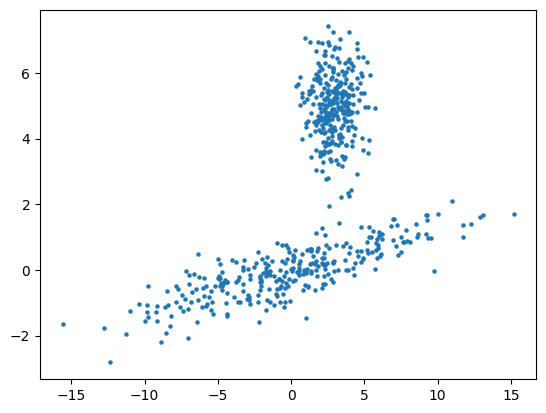

In [3]:
plt.scatter(X_train[:,0], X_train[:,1], s=5)

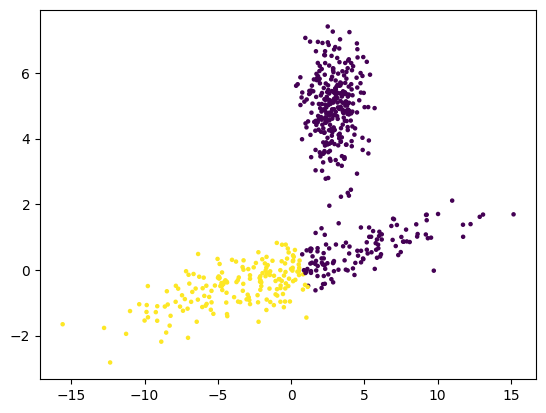

In [4]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
predict = kmeans.fit_predict(X_train)
plt.scatter(X_train[:,0], X_train[:,1], c=predict, s=5)

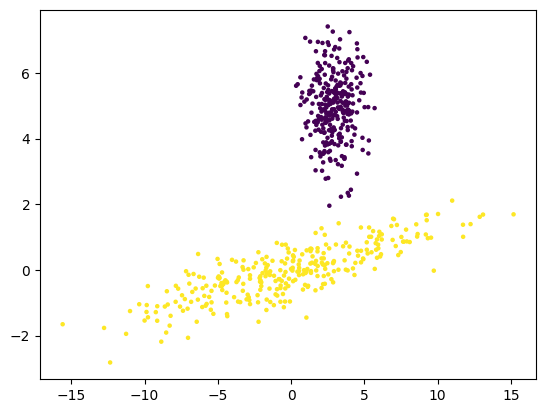

In [5]:
# fit a Gaussian Mixture Model with two components
# covariance_type="full" means that each component of the mixture model will have
# its own general covariance matrix (default).

gmm = GaussianMixture(n_components=2, covariance_type="full")
gmm.fit(X_train)
predict = gmm.predict(X_train)
plt.scatter(X_train[:,0], X_train[:,1], c=predict, s=5)

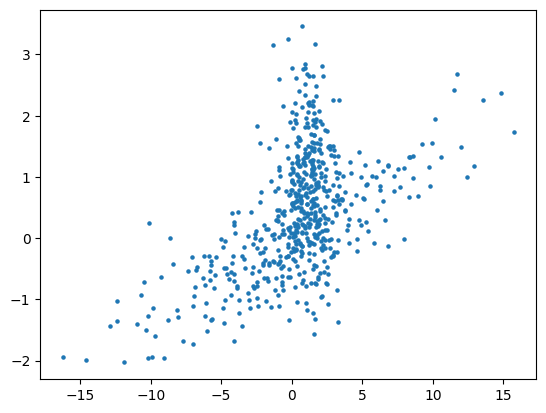

In [ ]:
# example 2

shifted_gaussian = np.random.randn(n_samples, 2) + np.array([1, 1])
C = np.array([[0.0, -0.5], [5.5, 0.7]])
stretched_gaussian = np.dot(np.random.randn(n_samples, 2), C)
X_train = np.vstack([shifted_gaussian, stretched_gaussian])
plt.scatter(X_train[:,0], X_train[:,1], s=5)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


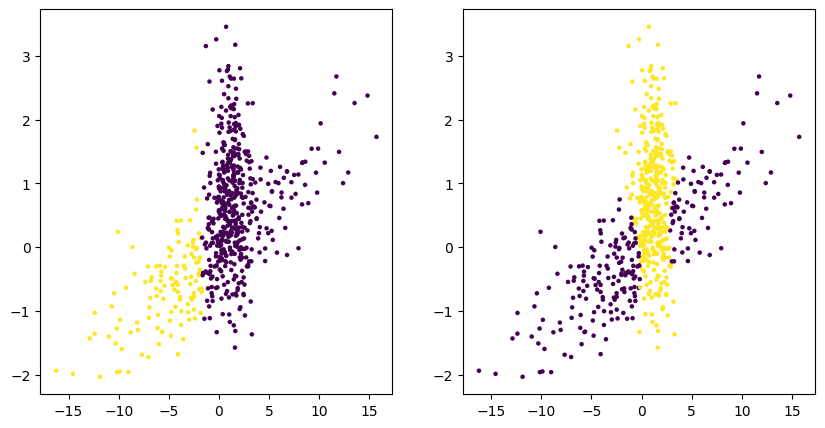

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
kmeans = KMeans(n_clusters=2)
predict = kmeans.fit_predict(X_train)
plt.scatter(X_train[:,0], X_train[:,1], c=predict, s=5)
plt.subplot(1,2,2)
mm = GaussianMixture(n_components=2, covariance_type="full")
gmm.fit(X_train)
predict = gmm.predict(X_train)
plt.scatter(X_train[:,0], X_train[:,1], c=predict, s=5)

[]

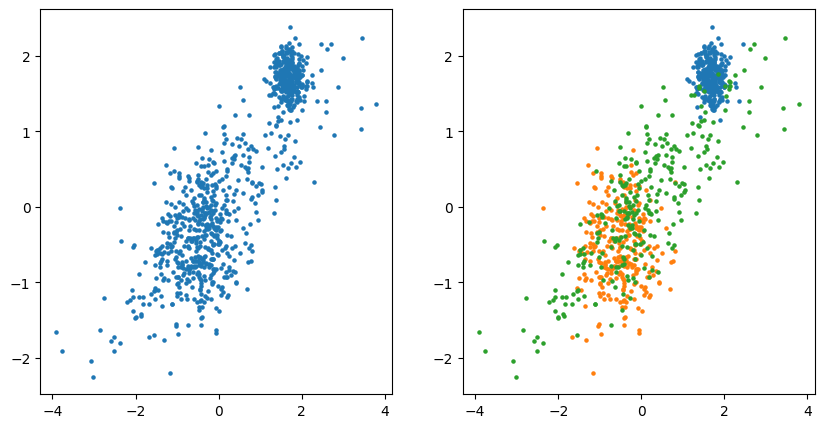

In [9]:
# example 3
n_samples = 300
gaussian1 = np.random.normal(1.7, 0.2, (n_samples, 2))
gaussian2 = np.random.normal(-0.5, 0.5, (n_samples, 2))
C = np.array([[0.0, 0.5], [1.3, 0.7]])
gaussian3 = np.dot(np.random.randn(n_samples, 2), C)
X = np.vstack([gaussian1, gaussian2, gaussian3])
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(X[:,0], X[:,1], s=5)
plt.subplot(1,2,2)
plt.scatter(gaussian1[:,0],gaussian1[:,1], s=5)
plt.scatter(gaussian2[:,0],gaussian2[:,1], s=5)
plt.scatter(gaussian3[:,0],gaussian3[:,1], s=5)
plt.plot()

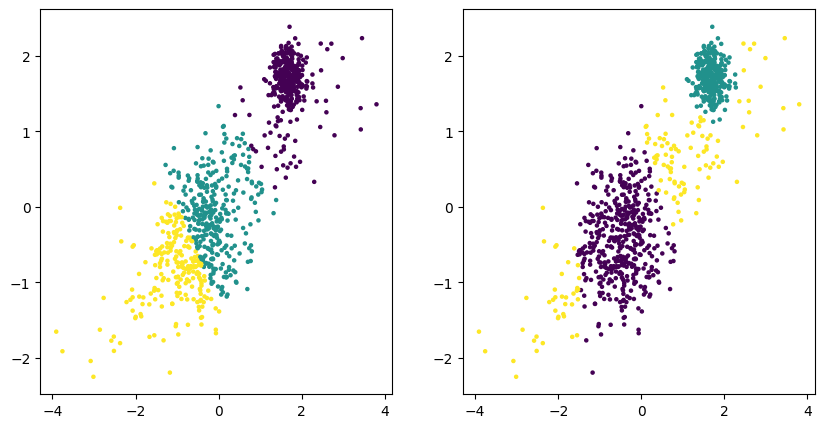

In [10]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
kmeans = KMeans(n_clusters=3)
predict = kmeans.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=predict, s=5)

plt.subplot(1,2,2)
gmm = GaussianMixture(n_components=3, covariance_type="full")
gmm.fit(X)    # estimate parameters with the EM algorithm
predict = gmm.predict(X)
plt.scatter(X[:,0], X[:,1], c=predict, s=5)

In [11]:
print(gmm.weights_ )    # weights of each mixture components
print(gmm.means_)       # the mean of each mixture components
print(gmm.covariances_) # The covariance of each mixture component. The shape depends on covariance_type:

[0.42717456 0.34055343 0.23227201]
[[-0.43889739 -0.41264227]
 [ 1.67941625  1.70678762]
 [ 0.04639339  0.03607987]]
[[[ 0.27846896  0.06000075]
  [ 0.06000075  0.3124778 ]]

 [[ 0.03980535 -0.00225315]
  [-0.00225315  0.04387889]]

 [[ 2.20042803  1.21732347]
  [ 1.21732347  0.91425091]]]


In [12]:
print(gmm.converged_) # True when convergence was reached in fit(), False otherwise.
print(gmm.n_iter_)    # Number of step used by the best fit of EM to reach the convergence.

True
15


In [13]:
X_new = ([[0.5, 1.3],
          [2.1, 0.5],
          [0.0, -0.5]])
gmm.predict(X_new), gmm.predict_proba(X_new)

(array([2, 2, 0]),
 array([[1.57181837e-01, 3.78297875e-07, 8.42817785e-01],
        [2.32365677e-04, 2.09223072e-06, 9.99765542e-01],
        [8.42108213e-01, 1.43727245e-41, 1.57891787e-01]]))

- log-likelihood
  - The likelihood values for individual data points can be quite small, especially when dealing with a large dataset. To avoid numerical issues arising from multiplying many small probabilities, it is common to work with the log-likelihood instead.
  - ln(P(X|θ))
  - measures how well the GMM fits the observed data
  - it serves as a useful relative metric for comparing different GMMs and assessing their performance.

In [ ]:
gmm.score(X)   # per-sample average log-likelihood
               # a measure of how well the GMM fits the observed data
               # (closer to zero values indicate a better fit)
               #

-24.461457498751855

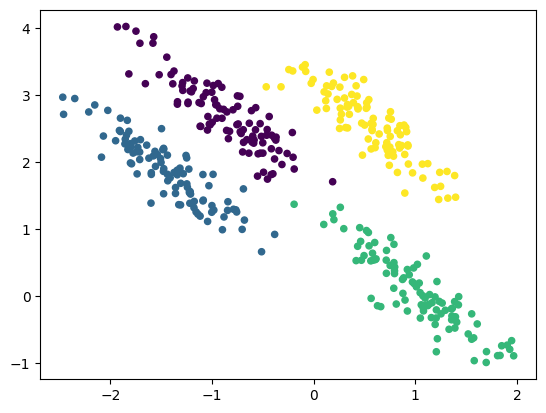

In [14]:
# example 4
from sklearn.datasets import make_blobs
X1, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.60, random_state=0)
np.random.seed(13)
X2 = np.dot(X1, np.random.randn(2, 2))
plt.scatter(X2[:, 0], X2[:, 1], c=y_true, s=20, cmap='viridis');

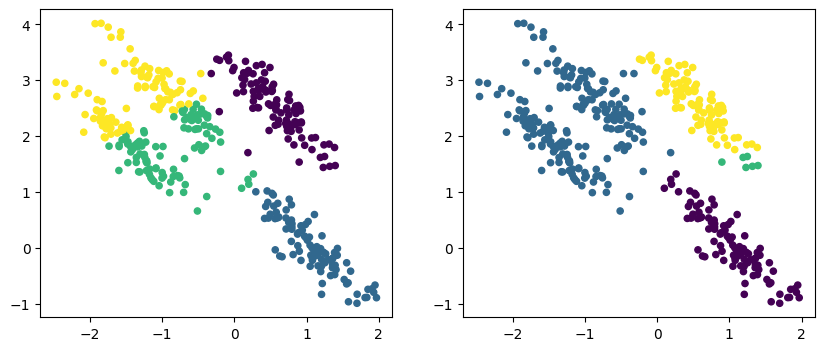

In [16]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
kmeans = KMeans(n_clusters=4, random_state=0)
k_labels = kmeans.fit_predict(X2)
plt.scatter(X2[:, 0], X2[:, 1], c=k_labels, s=20, cmap='viridis');

plt.subplot(1,2,2)
gmm = GaussianMixture(n_components=4, covariance_type="full", random_state=42)
gmm.fit(X2)    # estimate parameters with the EM algorithm
g_labels = gmm.predict(X2)
plt.scatter(X2[:,0], X2[:,1], c=g_labels, s=20, cmap='viridis')

In [ ]:
gmm.score(X2), np.exp(gmm.score(X2))

(-1.9184886179627711, 0.14682870878919427)

(-1.8887057773530034, 0.15126745597085647)

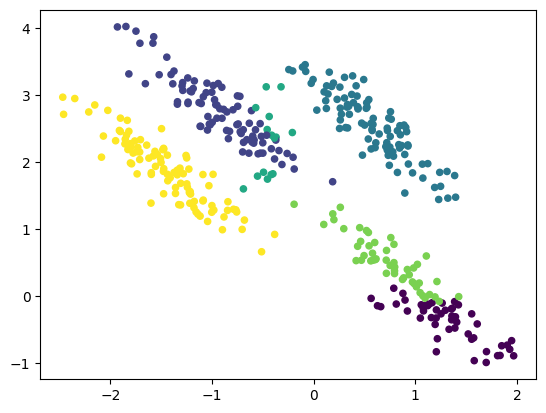

In [19]:
gmm = GaussianMixture(n_components=6, covariance_type="full", random_state=42)
gmm.fit(X2)    # estimate parameters with the EM algorithm
g_labels = gmm.predict(X2)
plt.scatter(X2[:,0], X2[:,1], c=g_labels, s=20, cmap='viridis')
gmm.score(X2), np.exp(gmm.score(X2))

## Density Estimation (**Generative** Probablistic model)
- the result of a GMM fit to some data is technically not a clustering model, but a generative probabilistic model describing the distribution of the data.
- Good to generate arbitrary multi-dimensional distribution of data.

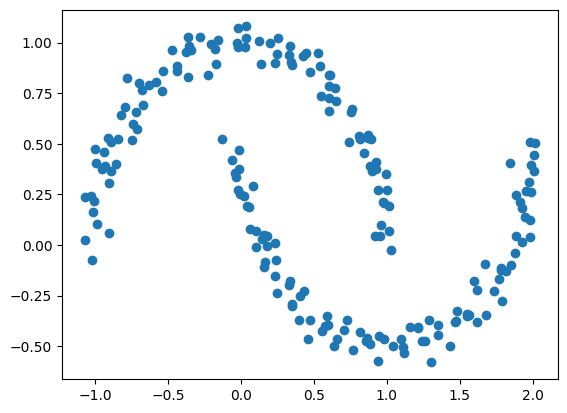

In [20]:
from sklearn.datasets import make_moons
Xmoon, ymoon = make_moons(200, noise=.05, random_state=0)
plt.scatter(Xmoon[:, 0], Xmoon[:, 1]);

(-1.708881898058684, 0.18106813210797412)

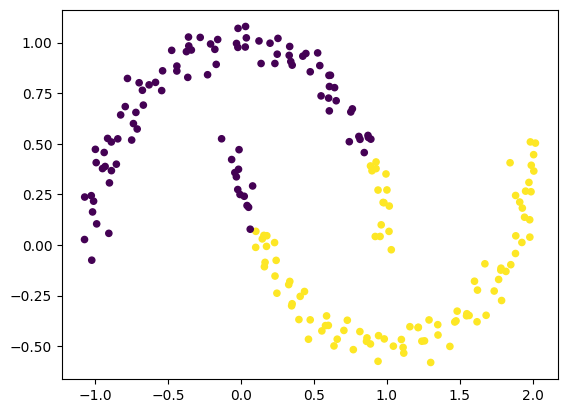

In [22]:
gmm2 = GaussianMixture(n_components=2, covariance_type='full', random_state=0)
gmm2.fit(Xmoon)    # estimate parameters with the EM algorithm
g_labels = gmm2.predict(Xmoon)
plt.scatter(Xmoon[:,0], Xmoon[:,1], c=g_labels, s=20, cmap='viridis')
gmm2.score(Xmoon), np.exp(gmm2.score(Xmoon))

(0.08394642387887932, 1.0875706244324146)

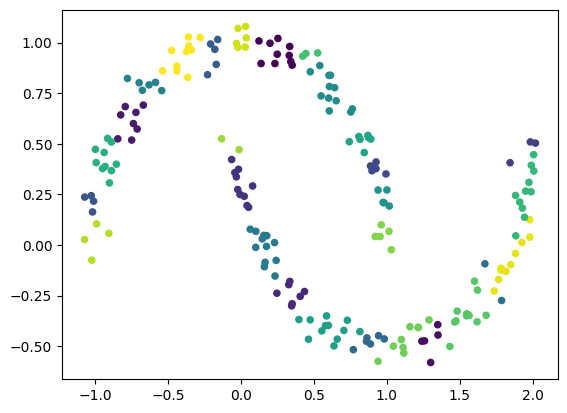

In [33]:
gmm16 = GaussianMixture(n_components=16, covariance_type='full', random_state=0)
g_labels = gmm16.fit_predict(Xmoon)
plt.scatter(Xmoon[:,0], Xmoon[:,1], c=g_labels, s=20, cmap='viridis')
gmm16.score(Xmoon), np.exp(gmm16.score(Xmoon))

- The GMM gives us the recipe to generate new random data distributed similarly to our input.
- For example, here are 400 new points drawn from this 16-component GMM fit to our original data:

In [31]:
# gmm16.means_, gmm16.covariances_

<class 'tuple'> 2


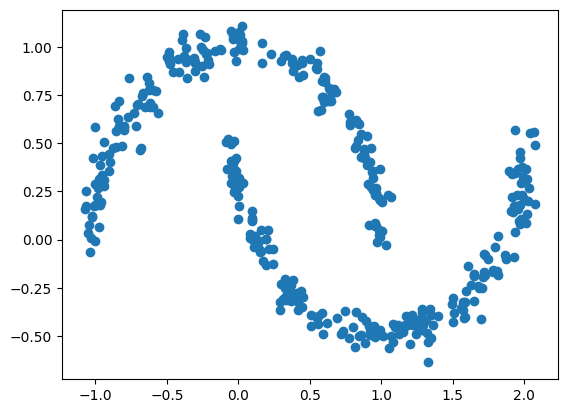

In [32]:
Xnew = gmm16.sample(400)       # returns a tuple (X, y)
print(type(Xnew), len(Xnew))
plt.scatter(Xnew[0][:, 0], Xnew[0][:, 1]);

- GMM is convenient as a flexible means of modeling an arbitrary multi-dimensional distribution of data.

------------------

# Exerise